In [87]:
"""
2026-01-07 Maria Yli-Heikkilä

Here we randomly plot time series showing how moving average (rolling average) works. 
It is the mean of 3 years (looking back).

What shall we do with the non-complete time series, e.g. post Soviet Union countries?

"""


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import faostat


# Results in:
fp = '/Users/myliheik/Documents/myPython/FBSadjusted/results/interpolatedLinear/Food-supply-quantity-kg-capita-yr-2023.csv'
df = pd.read_csv(fp)
df.head(1)

,index,Area Code,Area Code (M49),Area,Item Code,Item Code (FBS),Item,Element Code,Element,Year Code,...,Unit,Value,Flag,Domain,Note,MeanDiffBias,MeanDiffBiasPerc,OverlappingYears,NAsInterpolated,interpolationMethod
0,67.0,2.0,'004,Afghanistan,2905.0,'S2905,Cereals - Excluding Beer,645.0,Food supply quantity (kg/capita/yr),2010.0,...,kg/cap,202.05,E,BiasCorrectedAdjusted,NaN,13.3,7.0,4.0,202.05,NaN


In [2]:
# prepare dictionaries:
myAreaDict = df.set_index('Area').to_dict()['Area Code']
myAreaDictReverse = df.set_index('Area Code').to_dict()['Area']

myItemDict = df.set_index('Item').to_dict()['Item Code']
myItemDictReverse = df.set_index('Item Code').to_dict()['Item']

In [89]:
#myItemDict
#myAreaDict
len(myAreaDict)

204

In [88]:
mycountry = 'Finland'
myItemCode = 2513
myElement = 'Food supply quantity (kg/capita/yr)'

timeSeriesLength = 2023-1961+1
print(f'Time series lenght should be {timeSeriesLength}')

Time series lenght should be 63


In [73]:
def rollingMeanForOneItem(df, mycountry, myElement, myItemCode, timeSeriesLength):
    # Subset df:
    df2 = df[(df['Area'] == mycountry) & (df['Element'] == myElement) & (df['Item Code'] == myItemCode)]
    df2 = df2.assign(Time = pd.to_datetime(df2.Year, format='%Y'))
    if df2['Year'].duplicated().any():
        print('Duplicated years!')
    if len(df2) is not timeSeriesLength:
        print(f'Time series lenght is {len(df2)} and it should be {timeSeriesLength}')

    df3 = df2[['Time', 'NAsInterpolated']]
    df4 = df3.set_index('Time').sort_index()
    # moving average:
    df4['Moving average (looking back)'] = df4['NAsInterpolated'].rolling(3).mean()
    df4.rename(columns = {'NAsInterpolated': 'BiasCorrected'}, inplace = True)
    
    return df4

In [46]:
myItem = myItemDictReverse.get(myItemCode)

In [53]:
df5 = df4.reset_index()
df6 = pd.melt(df5, id_vars=['Time'], value_vars=['BiasCorrected', 'Moving average (looking back)'],
       var_name = 'Domain', value_name = myItem)
df6

,Time,Domain,Barley and products
0,1961-01-01,BiasCorrected,9.640000
1,1962-01-01,BiasCorrected,6.900000
2,1963-01-01,BiasCorrected,9.280000
3,1964-01-01,BiasCorrected,6.600000
4,1965-01-01,BiasCorrected,6.570000
...,...,...,...
121,2019-01-01,Moving average (looking back),6.180000
122,2020-01-01,Moving average (looking back),11.833333
123,2021-01-01,Moving average (looking back),18.090000
124,2022-01-01,Moving average (looking back),24.556667


In [67]:
def plotMovingAverage(data, axes, palette, myCountry, myItemCode):
    
    myItem = myItemDictReverse.get(myItemCode)
    if data['Unit'][0] == '1000 No':
        unit = '$\\times 10^{3}$'
    else:
        unit = data['Unit'][0]
        
    df5 = data.reset_index()
    
    df6 = pd.melt(df5, id_vars=['Time'], value_vars=['BiasCorrected', 'Moving average (looking back)'],
   var_name = 'Domain', value_name = myItem)
    
        
    ax = sns.lineplot(df6, y = myItem, x = 'Time', hue = 'Domain', palette=palette, ax = axes)

    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'{myCountry}, {myItem}')
    ax.set_ylabel(f'{myItem} ({unit})')


/var/folders/rb/c5sdfnq11t3f_0r8y_2_n_dr0000gn/T/ipykernel_3714/104641011.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.lineplot(df6, y = myItem, x = 'Time', hue = 'Domain', palette=palette, ax = axes)
/var/folders/rb/c5sdfnq11t3f_0r8y_2_n_dr0000gn/T/ipykernel_3714/104641011.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.lineplot(df6, y = myItem, x = 'Time', hue = 'Domain', palette=palette, ax = axes)


<function matplotlib.pyplot.show(close=None, block=None)>

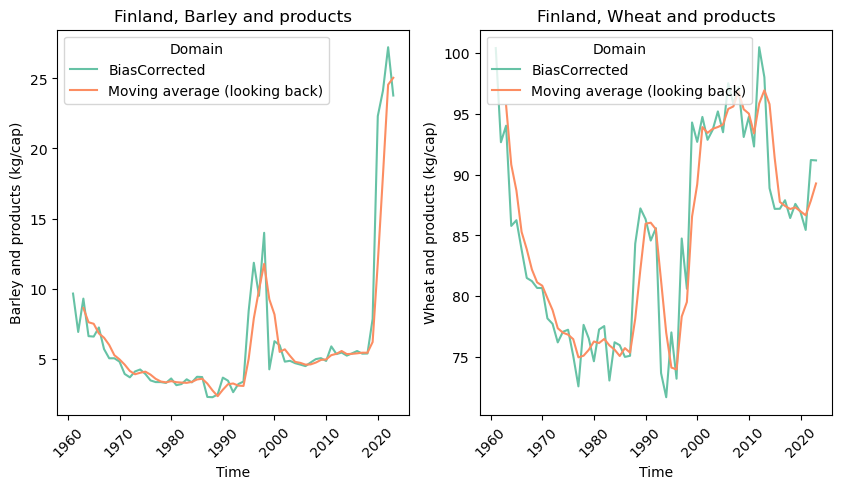

In [91]:
palette1 = sns.color_palette("Set2") 
palette11 = sns.color_palette("Set2")[1:]
palette2 = sns.color_palette("Set3")[3:] 

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

myCountry = 'Finland'
myItemCode = 2513
myElement = 'Food supply quantity (kg/capita/yr)'

df4 = rollingMeanForOneItem(df, myCountry, myElement, myItemCode, timeSeriesLength)
plotMovingAverage(df4, ax1, palette1, myCountry, myItemCode)

myItemCode = 2511
df4 = rollingMeanForOneItem(df, myCountry, myElement, myItemCode, timeSeriesLength)
plotMovingAverage(df4, ax2, palette1, myCountry, myItemCode)
plt.show

/var/folders/rb/c5sdfnq11t3f_0r8y_2_n_dr0000gn/T/ipykernel_3714/104641011.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.lineplot(df6, y = myItem, x = 'Time', hue = 'Domain', palette=palette, ax = axes)
/var/folders/rb/c5sdfnq11t3f_0r8y_2_n_dr0000gn/T/ipykernel_3714/104641011.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.lineplot(df6, y = myItem, x = 'Time', hue = 'Domain', palette=palette, ax = axes)


<function matplotlib.pyplot.show(close=None, block=None)>

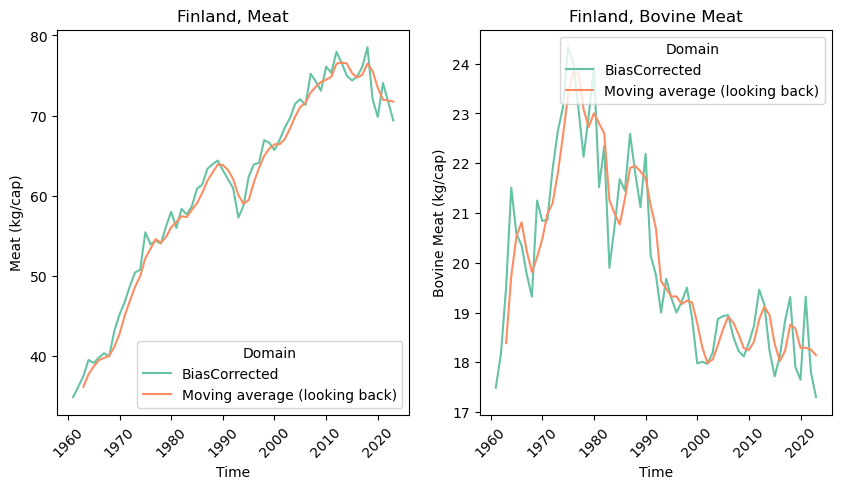

In [90]:
palette1 = sns.color_palette("Set2") 
palette11 = sns.color_palette("Set2")[1:]
palette2 = sns.color_palette("Set3")[3:] 

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

myCountry = 'Finland'
myItemCode = 2943
myElement = 'Food supply quantity (kg/capita/yr)'

df4 = rollingMeanForOneItem(df, myCountry, myElement, myItemCode, timeSeriesLength)
plotMovingAverage(df4, ax1, palette1, myCountry, myItemCode)

myItemCode = 2731
df4 = rollingMeanForOneItem(df, myCountry, myElement, myItemCode, timeSeriesLength)
plotMovingAverage(df4, ax2, palette1, myCountry, myItemCode)
plt.show

/var/folders/rb/c5sdfnq11t3f_0r8y_2_n_dr0000gn/T/ipykernel_3714/104641011.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.lineplot(df6, y = myItem, x = 'Time', hue = 'Domain', palette=palette, ax = axes)
/var/folders/rb/c5sdfnq11t3f_0r8y_2_n_dr0000gn/T/ipykernel_3714/104641011.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.lineplot(df6, y = myItem, x = 'Time', hue = 'Domain', palette=palette, ax = axes)


<function matplotlib.pyplot.show(close=None, block=None)>

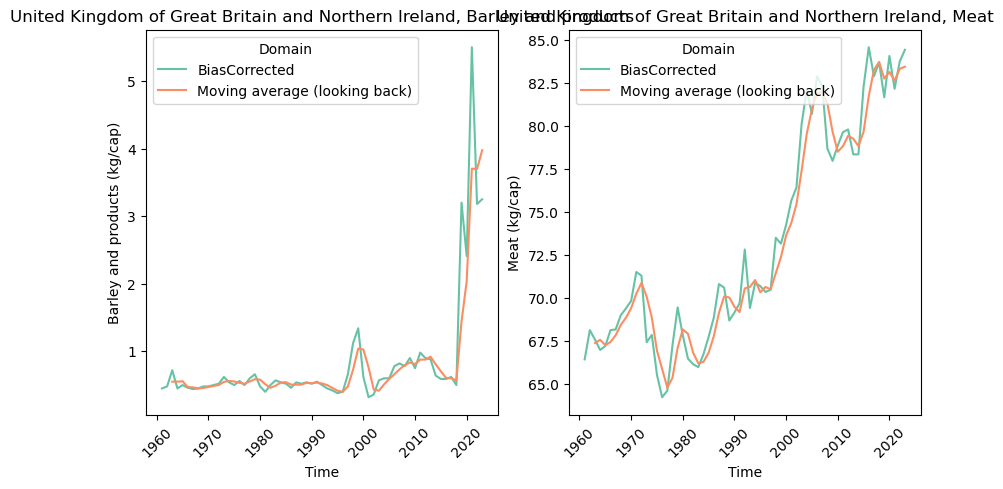

In [77]:
palette1 = sns.color_palette("Set2") 
palette11 = sns.color_palette("Set2")[1:]
palette2 = sns.color_palette("Set3")[3:] 

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

myCountry = 'United Kingdom of Great Britain and Northern Ireland'
myItemCode = 2513
myElement = 'Food supply quantity (kg/capita/yr)'

df4 = rollingMeanForOneItem(df, myCountry, myElement, myItemCode, timeSeriesLength)
plotMovingAverage(df4, ax1, palette1, myCountry, myItemCode)

myItemCode = 2943
df4 = rollingMeanForOneItem(df, myCountry, myElement, myItemCode, timeSeriesLength)
plotMovingAverage(df4, ax2, palette1, myCountry, myItemCode)
plt.show

/var/folders/rb/c5sdfnq11t3f_0r8y_2_n_dr0000gn/T/ipykernel_3714/104641011.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.lineplot(df6, y = myItem, x = 'Time', hue = 'Domain', palette=palette, ax = axes)
/var/folders/rb/c5sdfnq11t3f_0r8y_2_n_dr0000gn/T/ipykernel_3714/104641011.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.lineplot(df6, y = myItem, x = 'Time', hue = 'Domain', palette=palette, ax = axes)


<function matplotlib.pyplot.show(close=None, block=None)>

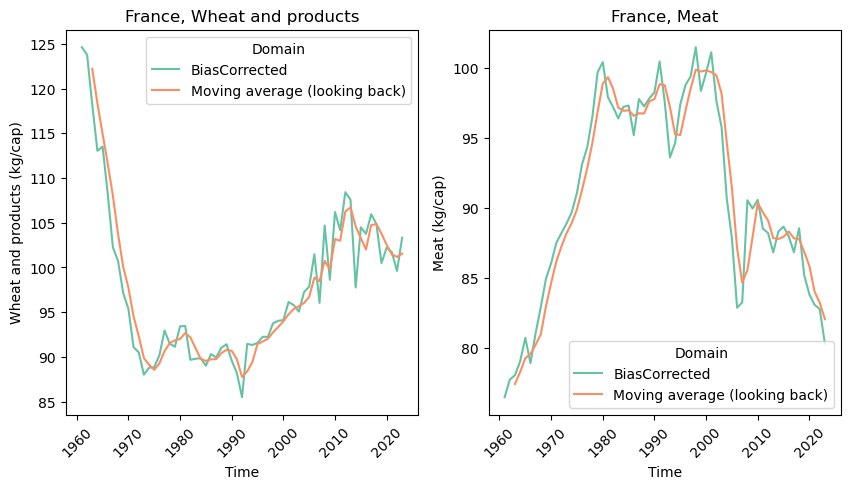

In [78]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

myCountry = 'France'
myItemCode = 2511
myElement = 'Food supply quantity (kg/capita/yr)'

df4 = rollingMeanForOneItem(df, myCountry, myElement, myItemCode, timeSeriesLength)
plotMovingAverage(df4, ax1, palette1, myCountry, myItemCode)

myItemCode = 2943
df4 = rollingMeanForOneItem(df, myCountry, myElement, myItemCode, timeSeriesLength)
plotMovingAverage(df4, ax2, palette1, myCountry, myItemCode)
plt.show

/var/folders/rb/c5sdfnq11t3f_0r8y_2_n_dr0000gn/T/ipykernel_3714/104641011.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.lineplot(df6, y = myItem, x = 'Time', hue = 'Domain', palette=palette, ax = axes)
/var/folders/rb/c5sdfnq11t3f_0r8y_2_n_dr0000gn/T/ipykernel_3714/104641011.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.lineplot(df6, y = myItem, x = 'Time', hue = 'Domain', palette=palette, ax = axes)


<function matplotlib.pyplot.show(close=None, block=None)>

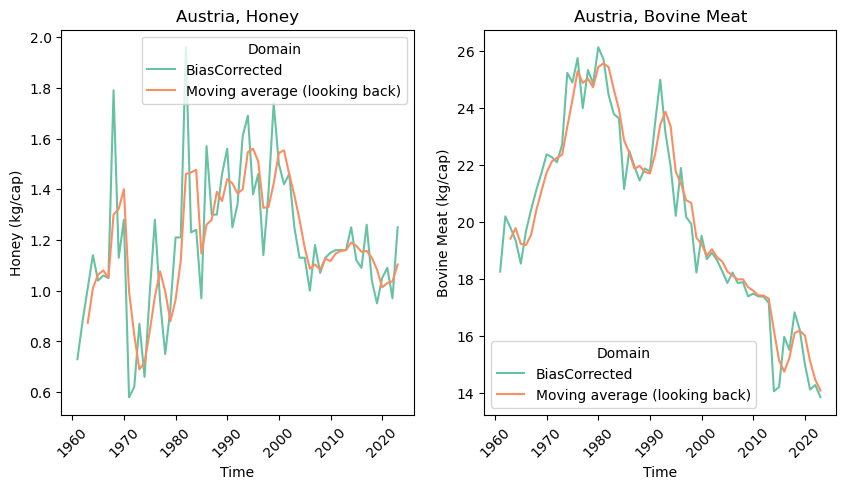

In [79]:


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

myCountry = 'Austria'
myItemCode = 2745
myElement = 'Food supply quantity (kg/capita/yr)'

df4 = rollingMeanForOneItem(df, myCountry, myElement, myItemCode, timeSeriesLength)
plotMovingAverage(df4, ax1, palette1, myCountry, myItemCode)

myItemCode = 2731
df4 = rollingMeanForOneItem(df, myCountry, myElement, myItemCode, timeSeriesLength)
plotMovingAverage(df4, ax2, palette1, myCountry, myItemCode)
plt.show

Time series lenght is 5 and it should be 63
Time series lenght is 32 and it should be 63


/var/folders/rb/c5sdfnq11t3f_0r8y_2_n_dr0000gn/T/ipykernel_3714/104641011.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.lineplot(df6, y = myItem, x = 'Time', hue = 'Domain', palette=palette, ax = axes)
/var/folders/rb/c5sdfnq11t3f_0r8y_2_n_dr0000gn/T/ipykernel_3714/104641011.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.lineplot(df6, y = myItem, x = 'Time', hue = 'Domain', palette=palette, ax = axes)


<function matplotlib.pyplot.show(close=None, block=None)>

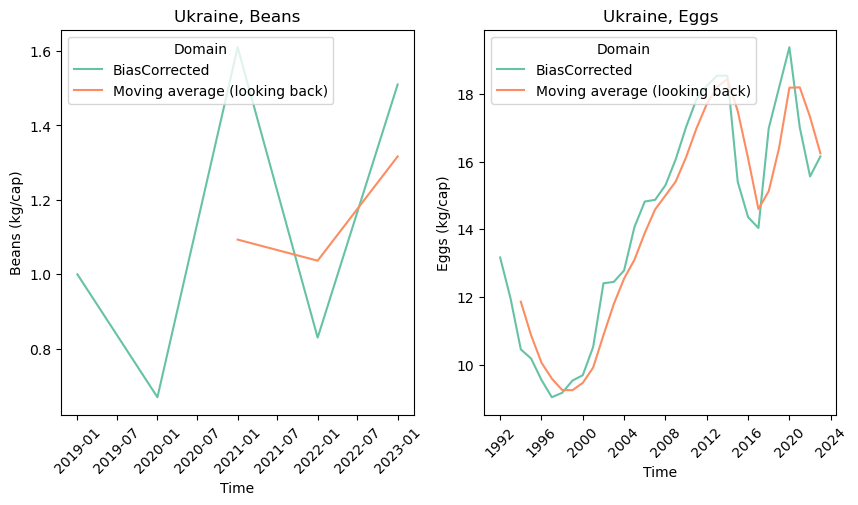

In [81]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

myCountry = 'Ukraine'
myItemCode = 2546
myElement = 'Food supply quantity (kg/capita/yr)'

df4 = rollingMeanForOneItem(df, myCountry, myElement, myItemCode, timeSeriesLength)
plotMovingAverage(df4, ax1, palette1, myCountry, myItemCode)

myItemCode = 2744
df4 = rollingMeanForOneItem(df, myCountry, myElement, myItemCode, timeSeriesLength)
plotMovingAverage(df4, ax2, palette1, myCountry, myItemCode)
plt.show

Time series lenght is 14 and it should be 63


/var/folders/rb/c5sdfnq11t3f_0r8y_2_n_dr0000gn/T/ipykernel_3714/104641011.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.lineplot(df6, y = myItem, x = 'Time', hue = 'Domain', palette=palette, ax = axes)
/var/folders/rb/c5sdfnq11t3f_0r8y_2_n_dr0000gn/T/ipykernel_3714/104641011.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.lineplot(df6, y = myItem, x = 'Time', hue = 'Domain', palette=palette, ax = axes)


<function matplotlib.pyplot.show(close=None, block=None)>

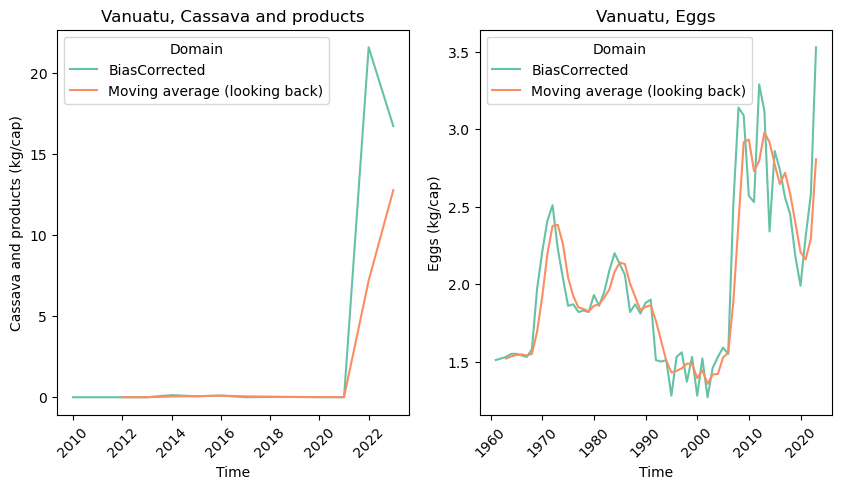

In [82]:
# Cases where interpolation was needed:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

myCountry = 'Vanuatu'
myItem = 'Cassava and products'
myItemCode = myItemDict.get(myItem)
myElement = 'Food supply quantity (kg/capita/yr)'

df4 = rollingMeanForOneItem(df, myCountry, myElement, myItemCode, timeSeriesLength)
plotMovingAverage(df4, ax1, palette1, myCountry, myItemCode)

myItemCode = 2744
df4 = rollingMeanForOneItem(df, myCountry, myElement, myItemCode, timeSeriesLength)
plotMovingAverage(df4, ax2, palette1, myCountry, myItemCode)
plt.show

/var/folders/rb/c5sdfnq11t3f_0r8y_2_n_dr0000gn/T/ipykernel_3714/104641011.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.lineplot(df6, y = myItem, x = 'Time', hue = 'Domain', palette=palette, ax = axes)
/var/folders/rb/c5sdfnq11t3f_0r8y_2_n_dr0000gn/T/ipykernel_3714/104641011.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.lineplot(df6, y = myItem, x = 'Time', hue = 'Domain', palette=palette, ax = axes)


<function matplotlib.pyplot.show(close=None, block=None)>

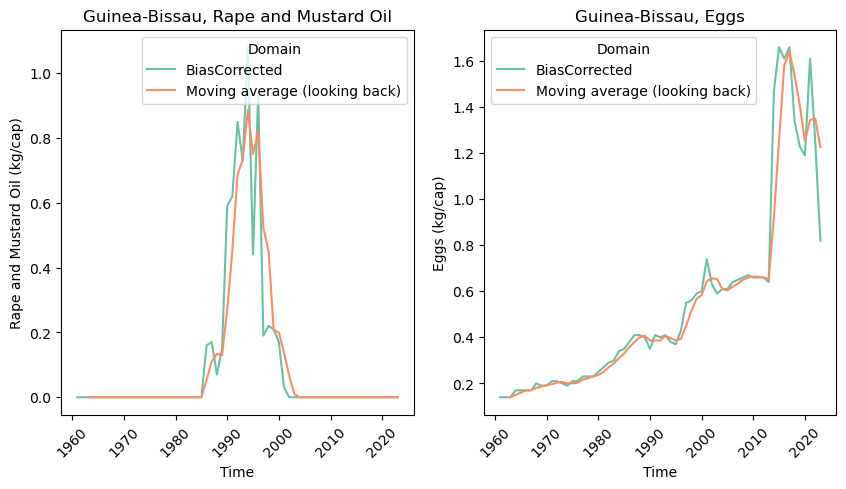

In [83]:
# Cases where interpolation was needed:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

myCountry = 'Guinea-Bissau'
myItem = 'Rape and Mustard Oil'
myItemCode = myItemDict.get(myItem)
myElement = 'Food supply quantity (kg/capita/yr)'

df4 = rollingMeanForOneItem(df, myCountry, myElement, myItemCode, timeSeriesLength)
plotMovingAverage(df4, ax1, palette1, myCountry, myItemCode)

myItemCode = 2744
df4 = rollingMeanForOneItem(df, myCountry, myElement, myItemCode, timeSeriesLength)
plotMovingAverage(df4, ax2, palette1, myCountry, myItemCode)
plt.show

Time series lenght is 14 and it should be 63


/var/folders/rb/c5sdfnq11t3f_0r8y_2_n_dr0000gn/T/ipykernel_3714/104641011.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.lineplot(df6, y = myItem, x = 'Time', hue = 'Domain', palette=palette, ax = axes)
/var/folders/rb/c5sdfnq11t3f_0r8y_2_n_dr0000gn/T/ipykernel_3714/104641011.py:15: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.lineplot(df6, y = myItem, x = 'Time', hue = 'Domain', palette=palette, ax = axes)


<function matplotlib.pyplot.show(close=None, block=None)>

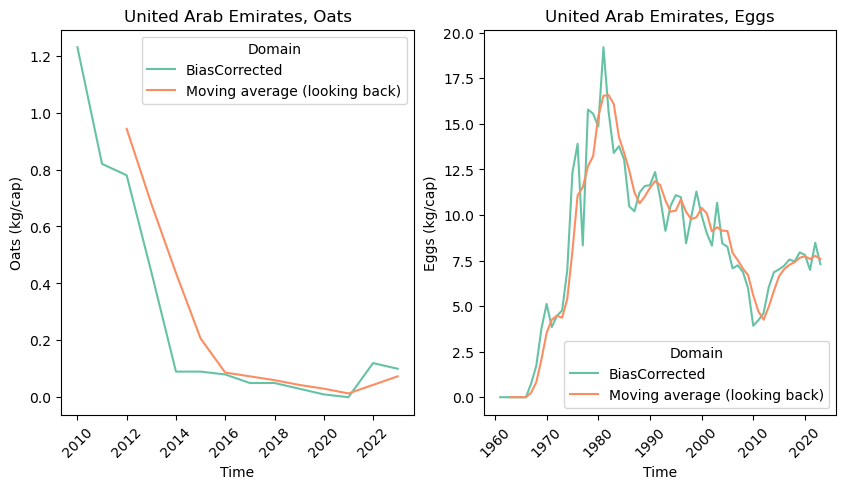

In [85]:
# Cases where interpolation was needed:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

myCountry = 'United Arab Emirates'
myItem = 'Oats'
myItemCode = myItemDict.get(myItem)
myElement = 'Food supply quantity (kg/capita/yr)'

df4 = rollingMeanForOneItem(df, myCountry, myElement, myItemCode, timeSeriesLength)
plotMovingAverage(df4, ax1, palette1, myCountry, myItemCode)

myItemCode = 2744
df4 = rollingMeanForOneItem(df, myCountry, myElement, myItemCode, timeSeriesLength)
plotMovingAverage(df4, ax2, palette1, myCountry, myItemCode)
plt.show

In [95]:
# which year the country enters our data?
dfAll = df[['Area', 'Year']].groupby('Area').min()
dfAll[dfAll['Year']  > 1961] # The ex-Soviet Union, Jugoslavia, Czechoslovakia, Belgium 2000(!), Luxembourg 2000(!), Serbia 2006?!

,Year
Area,
Armenia,1992
Azerbaijan,1992
Belarus,1992
Belgium,2000
Bosnia and Herzegovina,1992
Central Asia,1992
Croatia,1992
Czechia,1993
Estonia,1992
